<a href="https://colab.research.google.com/github/githubsaniya924/Hypothesis_Testing/blob/main/Ordinal_Vs_Scale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('StudentStatistics.csv',sep=';')

In [ ]:
data.head()

,RespNr,Location,OAA_ObjCourse,OAA_ObjClass,OAA_CourseExec,OAA_RelActObj,OAA_RelActExa,OAA_RelObjExa,OAA_LearProcAct,OAA_LearProcPrep,...,Mix_IntDiscus,Mix_IntPrep,Mix_IntExcel,Over_Grade,Gen_Gender,Gen_Age,Gen_SecSchool,Gen_Classes,Gen_NumberSubj,Gen_Time
0,1.0,Rotterdam,Fully Disagree,Fully Disagree,Fully Disagree,Disagree,Fully Disagree,Fully Disagree,Fully Disagree,Fully Disagree,...,Not at all,not so much,not so much,20.0,Female,22.0,NaN,NaN,Fully agree,20 < 30
1,2.0,Haarlem,Disagree,Disagree,NaN,Fully Disagree,Neither disagree nor agree,Agree,Disagree,Neither disagree nor agree,...,not so much,somewhat,somewhat,50.0,Male,NaN,The Netherlands,6.0,Disagree,10 < 20
2,3.0,Diemen,Fully agree,Fully agree,Agree,Fully agree,Fully agree,Fully agree,Fully agree,Agree,...,Very much,somewhat,somewhat,80.0,Male,37.0,Africa,7.0,Agree,10 < 20
3,4.0,Rotterdam,Fully Disagree,Neither disagree nor agree,Disagree,Neither disagree nor agree,Neither disagree nor agree,Fully Disagree,Fully Disagree,Neither disagree nor agree,...,NaN,neutral,neutral,15.0,Female,24.0,The Netherlands,6.0,Agree,10 < 20
4,5.0,Haarlem,Disagree,Agree,Fully Disagree,Neither disagree nor agree,Fully agree,Fully agree,Neither disagree nor agree,Fully agree,...,Not at all,somewhat,Very much,40.0,Male,19.0,The Netherlands,7.0,Fully agree,10 < 20


In [ ]:
#Extrating one ordinal column and one scale column
#1. Teach_Motivate - ordinal data
#2. Over_Grade - Scale

In [ ]:
#Group by Teach_Motivate table and find the aggreates of the over_grade variable
data.groupby('Teach_Motivate')['Over_Grade'].agg(['mean','median','std','min'])

,mean,median,std,min
Teach_Motivate,,,,
Agree,78.000000,75.0,12.179217,65.0
Disagree,52.777778,50.0,18.219343,20.0
Fully Disagree,36.812500,38.0,14.725120,10.0
Fully agree,84.600000,85.0,10.526158,70.0
Neither disagree nor agree,69.181818,70.0,16.898628,30.0


<Axes: xlabel='Over_Grade', ylabel='Count'>

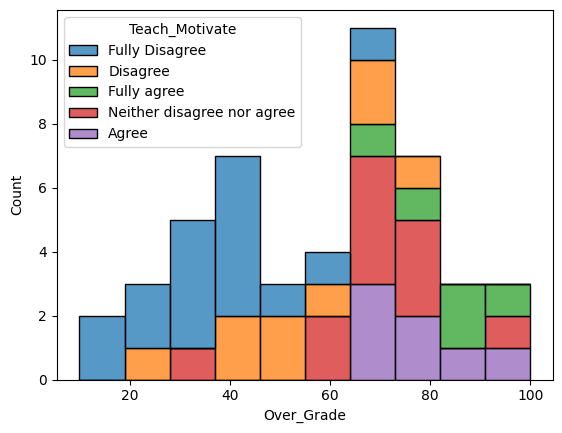

In [ ]:
#Visual representation of the scores

#1
import seaborn as sns

sns.histplot(data=data, x='Over_Grade', hue='Teach_Motivate', bins=10, multiple='stack') #muliple has other values like layer,dodge

<Axes: xlabel='Teach_Motivate', ylabel='Over_Grade'>

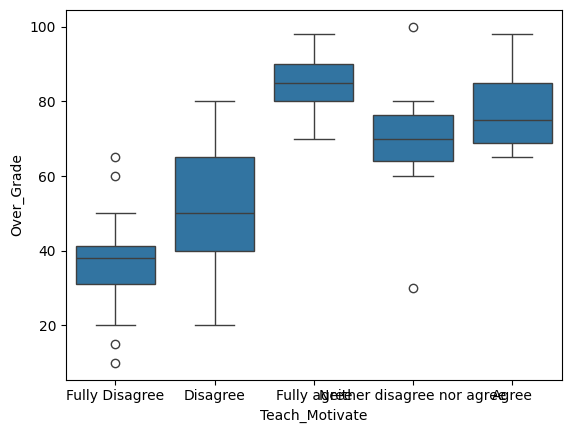

In [ ]:
sns.boxplot(x='Teach_Motivate',y='Over_Grade',data=data)

<Axes: xlabel='Over_Grade', ylabel='Count'>

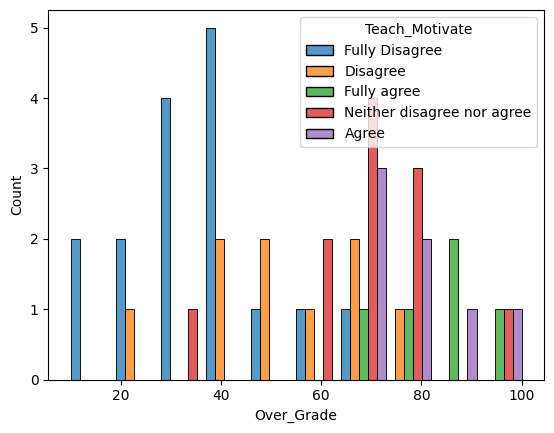

In [ ]:
sns.histplot(data=data, x='Over_Grade', hue='Teach_Motivate', bins=10, multiple='dodge')

In [ ]:
data['Teach_Motivate'].unique()

array(['Fully Disagree', 'Disagree', 'Fully agree',
       'Neither disagree nor agree', nan, 'Agree'], dtype=object)

In [ ]:
coding = ({
           'Fully Disagree':0,
           'Disagree':1,
           'Neither disagree nor agree':2,
           'Agree':3,
           'Fully agree':4,

})

In [ ]:
mydata = data[['Teach_Motivate','Over_Grade']]

In [ ]:
mydata['Teach_Motivate'] = mydata['Teach_Motivate'].replace(coding)

<ipython-input-16-5d196f41f1d5>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mydata['Teach_Motivate'] = mydata['Teach_Motivate'].replace(coding)
<ipython-input-16-5d196f41f1d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata['Teach_Motivate'] = mydata['Teach_Motivate'].replace(coding)


In [ ]:
mydata.corr(method='spearman')

,Teach_Motivate,Over_Grade
Teach_Motivate,1.0000,0.7872
Over_Grade,0.7872,1.0000


In [ ]:
import scipy
from scipy.stats import spearmanr

spearmanr(mydata, nan_policy='omit')

SignificanceResult(statistic=0.7871998951252405, pvalue=3.236363793284169e-11)

In [ ]:
statistic=0.7871998951252405
pvalue=3.236363793284169e-11

#pvalue<0.05
#We can reject the null hypothesis
#Therefore the result is significant

In [ ]:
rho = abs(statistic)
rho

0.7871998951252405

In [ ]:
if rho < 0.1:
  print('negligible')
elif rho < 0.2:
  print('weak')
elif rho < 0.4:
  print('moderate')
elif rho < 0.6:
  print('relatively strong')
elif rho < 0.8:
  print('strong')
else:
  print('Strong')

strong
